In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
L1=1.
L2=1.

In [3]:
l=np.array([L1,L2])

pr=np.random.random()*l.sum()
p_th=np.random.random()*2*np.pi
Dp=np.array([pr*np.cos(p_th),pr*np.sin(p_th)])

In [5]:
def Jacob(th,l):
    l1=l[0]
    l2=l[1]
    th1=th[0]
    th2=th[1]

    J=np.array([[-l1*np.sin(th1)-l2*np.sin(th1+th2),-l2*np.sin(th1+th2)],
    [l1*np.cos(th1)+l2*np.cos(th1+th2),l2*np.cos(th1+th2)]])

    return J

In [10]:
def forw_kin(th,l):
    l1=l[0]
    l2=l[1]
    th1=th[0]
    pos=np.array([l2*np.cos(th.sum())+l1*np.cos(th1),l2*np.sin(th.sum())+l1*np.sin(th1)])
    return pos

In [16]:
def sim(th,dt):
    k=0.5
    y=th
    while True:
        J=Jacob(th,l)
        P_end=forw_kin(th,l)

        error=Dp-P_end

        P_error=k*(error)
        omg=np.matmul(np.linalg.inv(J),P_error)
        th=th+dt*omg
        y=np.vstack((y,th))
        if(np.linalg.norm(error)<=0.01):
            break

    return y








In [17]:
dt=0.1
l_th=np.array([np.pi/4,np.pi/4])
ini_state=l_th

y=sim(ini_state,dt)


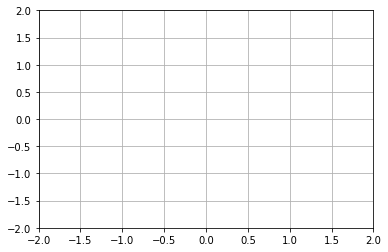

In [25]:
x1=L1*np.cos(y[:,0])
y1=L1*np.sin(y[:,0])
x2=L2*np.cos(y[:,0]+y[:,1])+x1
y2=L2*np.sin(y[:,0]+y[:,1])+y1

fig=plt.figure()
ax=fig.add_subplot(111,autoscale_on=False,xlim=(-2,2),ylim=(-2,2))
ax.grid()
line,=ax.plot([],[],'o-',lw=2)
time_template='time = %.1fs'
time_text=ax.text(0.05,0.9,"",transform=ax.transAxes)
linepath,=ax.plot([],[])
line1path,=ax.plot([],[])

In [26]:
def init():
    line.set_data([],[])
    linepath.set_data([],[])
    line1path.set_data([],[])
    time_text.set_text('')

    return line,linepath,line1path,time_text
    
def animate(i):
    thisx=[0,x1[i],x2[i]]
    thisy=[0,y1[i],y2[i]]
    line.set_data(thisx,thisy)
    
    time_text.set_text(time_template % (i*dt))

    linepath.set_data(x2[:i],y2[:i])
    line1path.set_data(x1[:i],y1[:i])

    return line,linepath,line1path,time_text

In [27]:
ani=animation.FuncAnimation(fig,animate,np.arange(1,len(y)),interval=30,blit=True,init_func=init)
ax.plot(Dp[0],Dp[1],marker='o',markersize=3,color='red')

plt.show()
ani.save('ik.gif',writer='imagemagick',fps=50)